In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Read data

In [2]:
df=pd.read_csv("CVD1.csv")
df

,General_Health,Checkup,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Very Good,5 or more years ago,Yes,No,No,No,No,Male,25-29,196,138.35,36.17,No,8,12,4,8
49995,Fair,Within the past year,No,No,No,No,No,Female,30-34,152,149.69,64.45,Yes,0,16,30,4
49996,Good,Within the past 2 years,Yes,No,No,No,No,Male,18-24,168,92.99,33.09,No,0,1,4,3
49997,Good,Within the past year,Yes,No,No,No,No,Female,25-29,150,63.50,28.28,No,28,4,14,14


### Data understanding

In [3]:
df.size

849983

In [4]:
df.shape

(49999, 17)

In [5]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Depression',
       'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

In [6]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [7]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,170.302586,81.888932,28.154877,5.311146,30.487210,16.018040,5.948999
std,10.764229,20.651591,6.361477,8.380120,25.326837,15.628862,8.480203
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.780000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.120000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.190000,7.000000,30.000000,24.000000,8.000000
max,234.000000,272.160000,98.440000,30.000000,120.000000,120.000000,120.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                49999 non-null  object 
 1   Checkup                       49999 non-null  object 
 2   Exercise                      49999 non-null  object 
 3   Heart_Disease                 49999 non-null  object 
 4   Depression                    49999 non-null  object 
 5   Diabetes                      49999 non-null  object 
 6   Arthritis                     49999 non-null  object 
 7   Sex                           49999 non-null  object 
 8   Age_Category                  49999 non-null  object 
 9   Height_(cm)                   49999 non-null  int64  
 10  Weight_(kg)                   49999 non-null  float64
 11  BMI                           49999 non-null  float64
 12  Smoking_History               49999 non-null  object 
 13  A

In [9]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [10]:
df.duplicated().sum()

2

In [11]:
df["Heart_Disease"].value_counts()

Heart_Disease
No     46167
Yes     3832
Name: count, dtype: int64

### EDA

<Axes: >

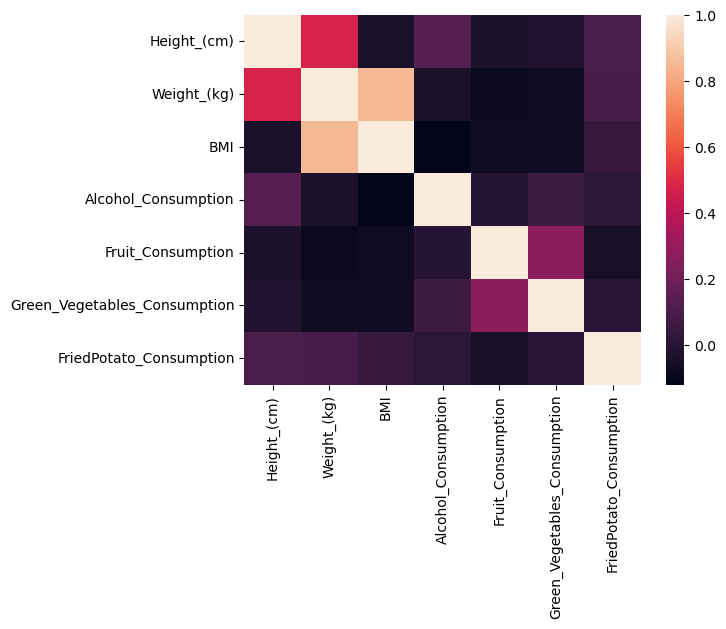

In [12]:
cor=df.select_dtypes(include=["float64","int64"])
sns.heatmap(cor.corr())

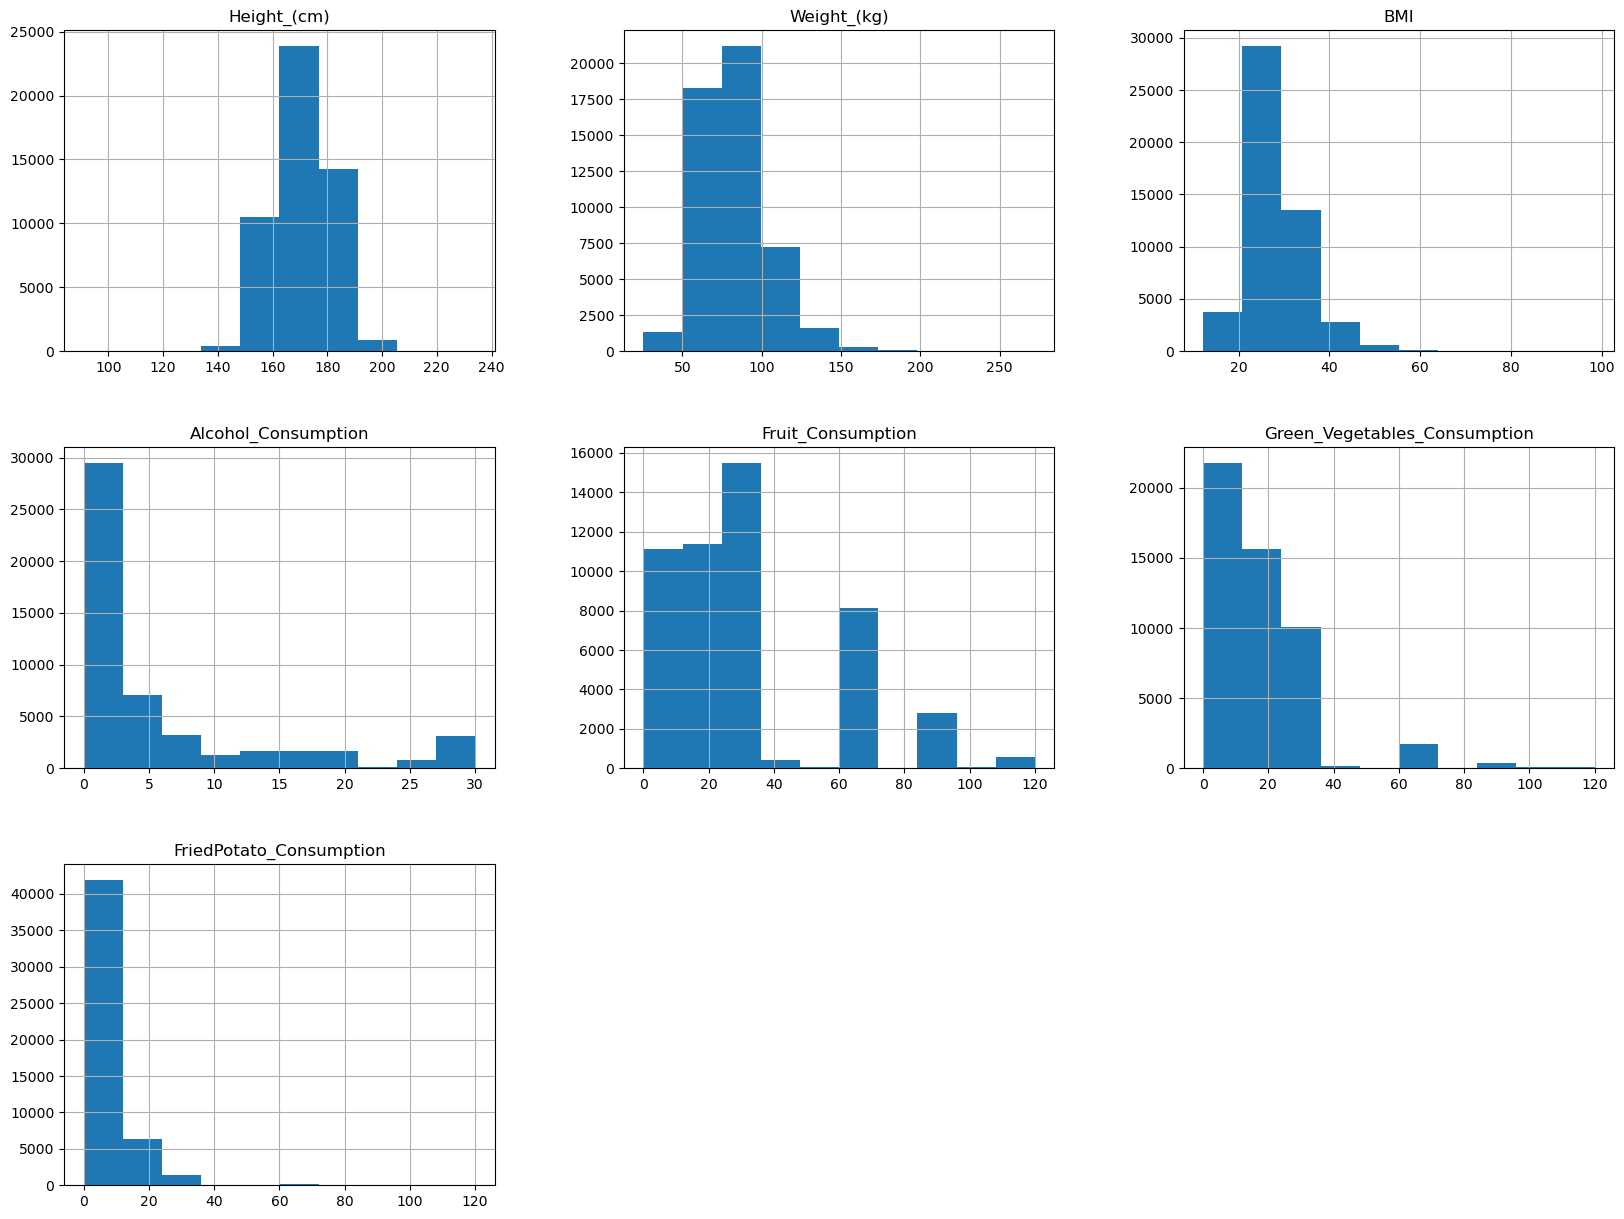

In [13]:
df.hist(figsize=(20,15));
plt.savefig("plt.png")

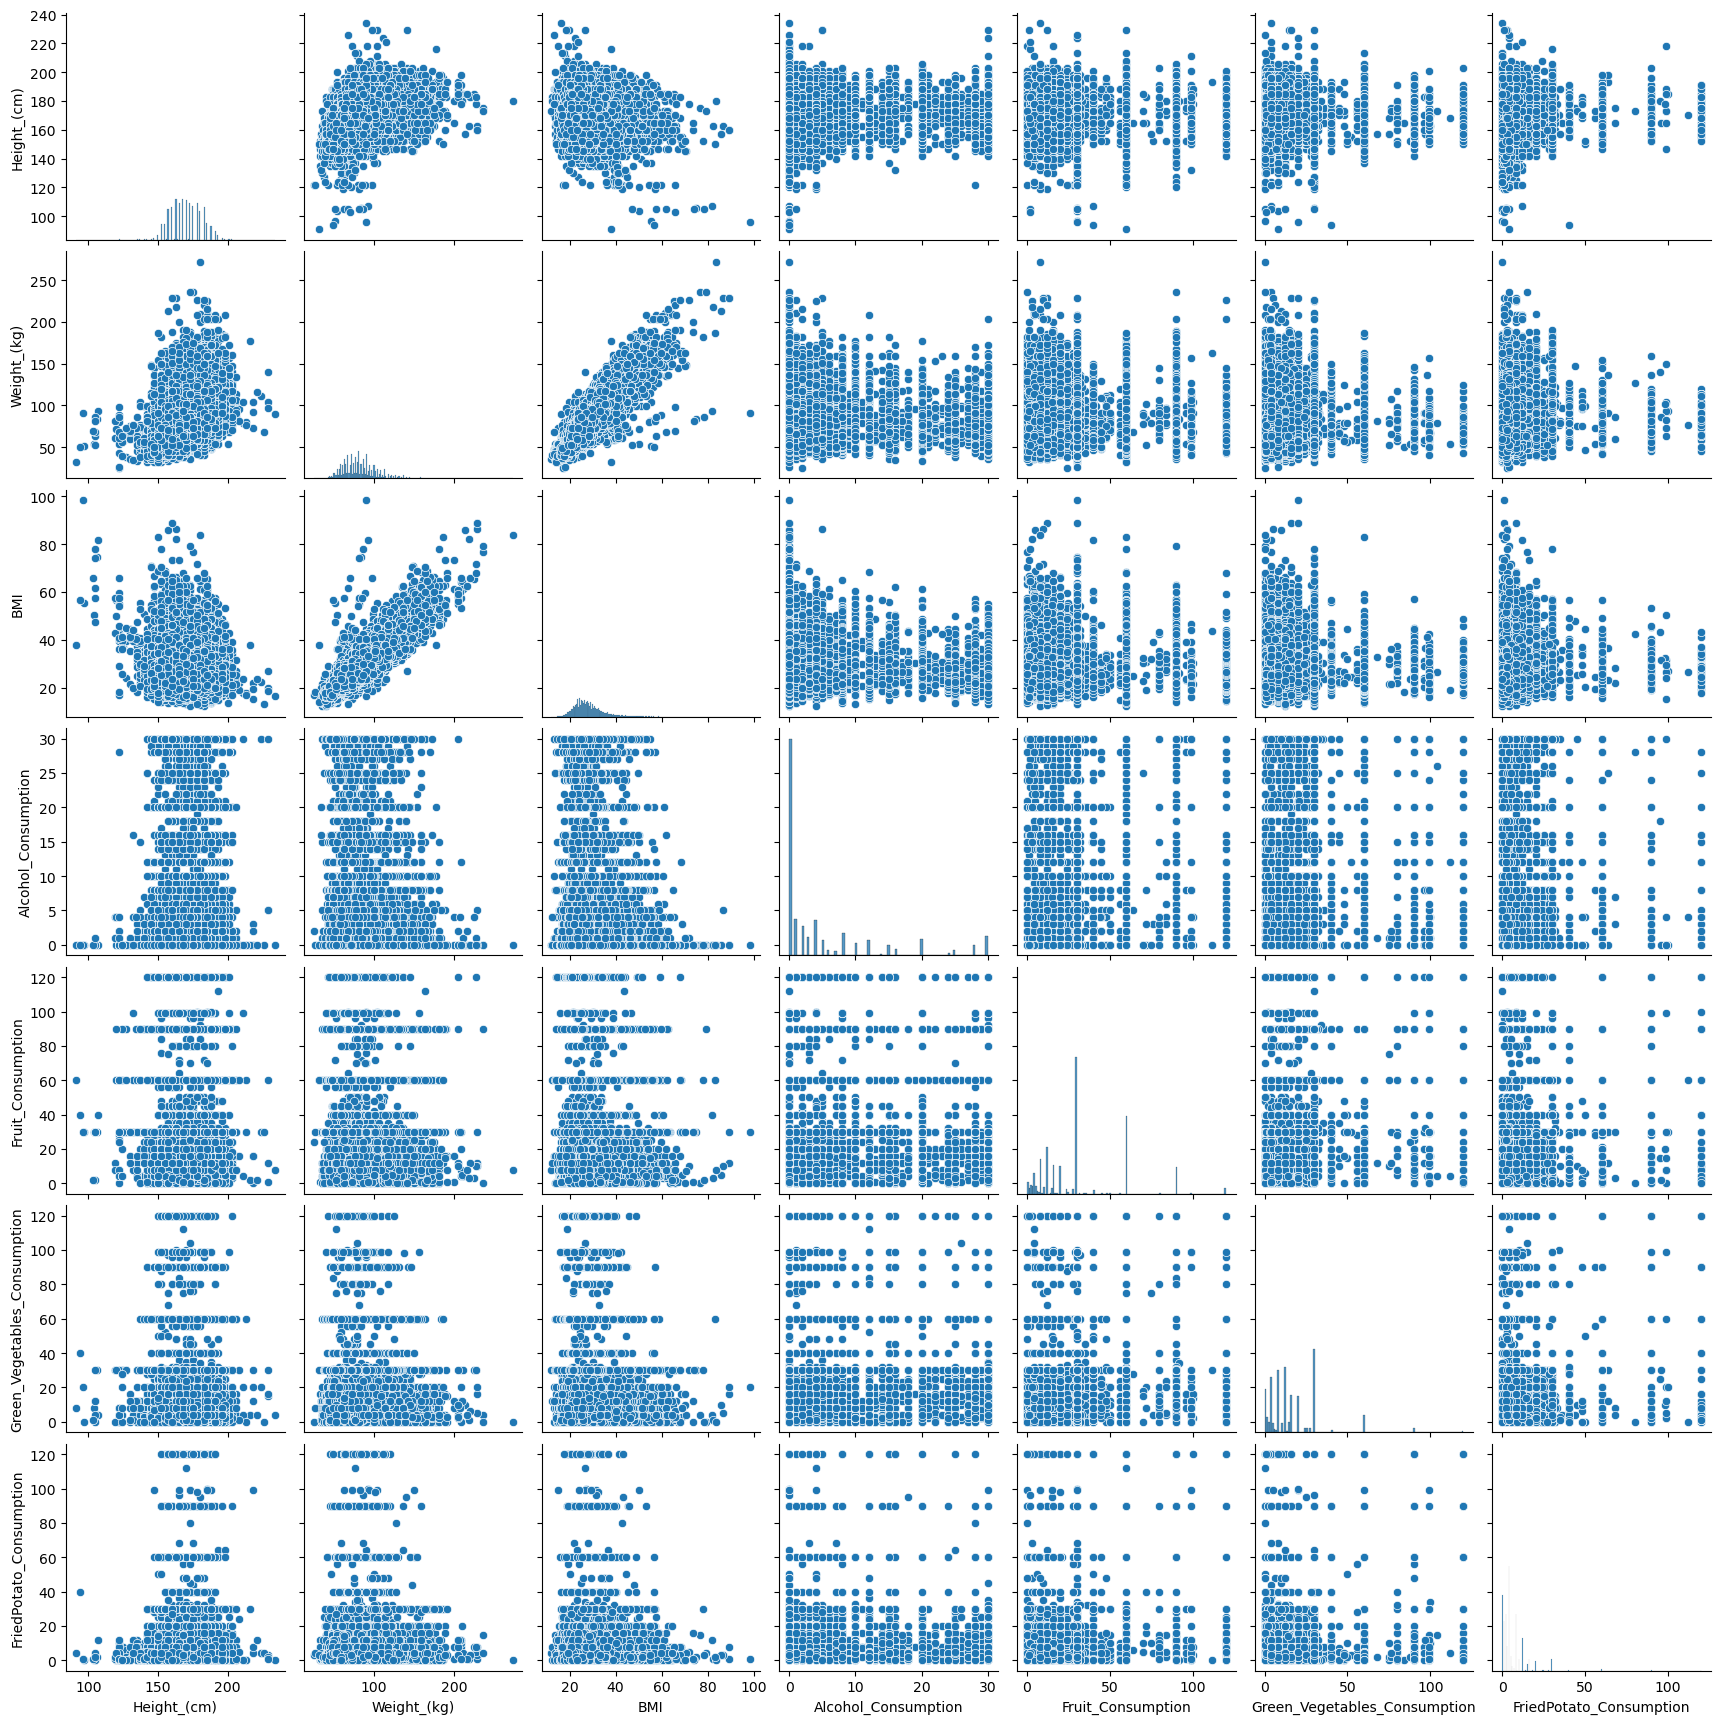

In [14]:
sns.pairplot(df)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Height_(cm)'),
  Text(1, 0, 'Weight_(kg)'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'Alcohol_Consumption'),
  Text(4, 0, 'Fruit_Consumption'),
  Text(5, 0, 'Green_Vegetables_Consumption'),
  Text(6, 0, 'FriedPotato_Consumption')])

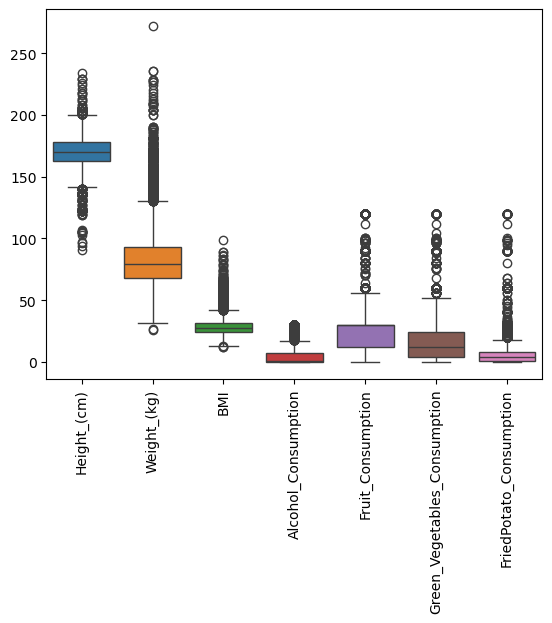

In [15]:
sns.boxplot(df)
plt.xticks(rotation=90)

### Preprocessing

#### Removing duplicates

In [16]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

#### Outliers detecting and replacing 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Height_(cm)'),
  Text(1, 0, 'Weight_(kg)'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'Alcohol_Consumption'),
  Text(4, 0, 'Fruit_Consumption'),
  Text(5, 0, 'Green_Vegetables_Consumption'),
  Text(6, 0, 'FriedPotato_Consumption')])

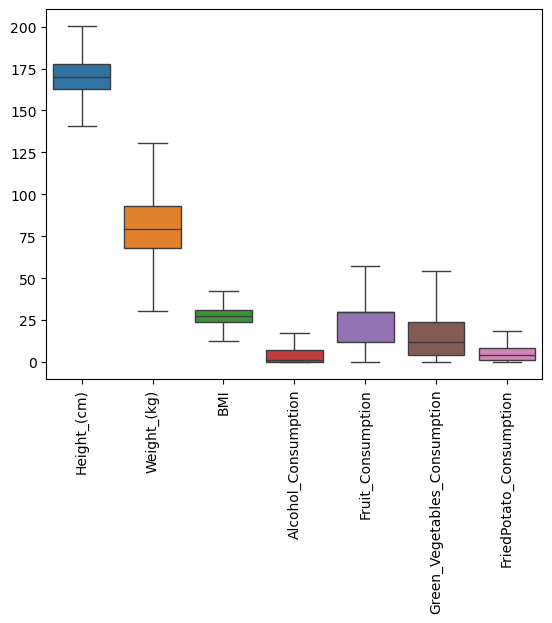

In [18]:
outliers_list=["Height_(cm)","Weight_(kg)","BMI","Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption"]

for i in outliers_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    df.loc[(df[i]>=UB),i]=UB
    df.loc[(df[i]<=LB),i]=LB

sns.boxplot(df)
plt.xticks(rotation=90)

In [224]:
Outliers=[]
for x in df:
    if((x<LB) or (x>UB)):
        Outliers.append(x)

print(Outliers)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

#### Encoding

In [20]:
encoder1=LabelEncoder()
df["General_Health"]=encoder1.fit_transform(df["General_Health"])
encoder2=LabelEncoder()
df["Checkup"]=encoder2.fit_transform(df["Checkup"])
encoder3=LabelEncoder()
df["Exercise"]=encoder3.fit_transform(df["Exercise"])
encoder4=LabelEncoder()
df["Heart_Disease"]=encoder4.fit_transform(df["Heart_Disease"])
encoder5=LabelEncoder()
df["Depression"]=encoder5.fit_transform(df["Depression"])
encoder6=LabelEncoder()
df["Diabetes"]=encoder6.fit_transform(df["Diabetes"])
encoder7=LabelEncoder()
df["Arthritis"]=encoder7.fit_transform(df["Arthritis"])
encoder8=LabelEncoder()
df["Sex"]=encoder8.fit_transform(df["Sex"])
encoder9=LabelEncoder()
df["Smoking_History"]=encoder9.fit_transform(df["Smoking_History"])
encoder10=LabelEncoder()
df["Age_Category"]=encoder10.fit_transform(df["Age_Category"])
df

,General_Health,Checkup,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,1,0,10,150.0,32.660,14.540,1,0.0,30,16,12.0
1,4,4,0,1,0,2,0,0,10,165.0,77.110,28.290,0,0.0,30,0,4.0
2,4,4,1,0,0,2,0,0,8,163.0,88.450,33.470,0,4.0,12,3,16.0
3,3,4,1,1,0,2,0,1,11,180.0,93.440,28.730,0,0.0,30,30,8.0
4,2,4,0,0,0,0,0,1,12,191.0,88.450,24.370,1,0.0,8,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,4,0,1,0,0,0,0,1,1,196.0,130.415,36.170,0,8.0,12,4,8.0
49995,1,4,0,0,0,0,0,0,2,152.0,130.415,42.305,1,0.0,16,30,4.0
49996,2,2,1,0,0,0,0,1,0,168.0,92.990,33.090,0,0.0,1,4,3.0
49997,2,4,1,0,0,0,0,0,1,150.0,63.500,28.280,0,17.5,4,14,14.0


### X,Y Seperation

In [21]:
#X,Y Seperation
x=df.drop("Heart_Disease", axis=1)
y=df["Heart_Disease"]

In [22]:
x

,General_Health,Checkup,Exercise,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,1,0,10,150.0,32.660,14.540,1,0.0,30,16,12.0
1,4,4,0,0,2,0,0,10,165.0,77.110,28.290,0,0.0,30,0,4.0
2,4,4,1,0,2,0,0,8,163.0,88.450,33.470,0,4.0,12,3,16.0
3,3,4,1,0,2,0,1,11,180.0,93.440,28.730,0,0.0,30,30,8.0
4,2,4,0,0,0,0,1,12,191.0,88.450,24.370,1,0.0,8,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,4,0,1,0,0,0,1,1,196.0,130.415,36.170,0,8.0,12,4,8.0
49995,1,4,0,0,0,0,0,2,152.0,130.415,42.305,1,0.0,16,30,4.0
49996,2,2,1,0,0,0,1,0,168.0,92.990,33.090,0,0.0,1,4,3.0
49997,2,4,1,0,0,0,0,1,150.0,63.500,28.280,0,17.5,4,14,14.0


In [23]:
y

0        0
1        1
2        0
3        1
4        0
        ..
49994    0
49995    0
49996    0
49997    0
49998    0
Name: Heart_Disease, Length: 49997, dtype: int32

#### Scailing

In [24]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[ 0.5095999 , -1.41618739, -1.92453349, ...,  0.1396388 ,
         0.05053717,  1.31461403],
       [ 1.17613923,  0.50796938, -1.92453349, ...,  0.1396388 ,
        -1.17579638, -0.24058875],
       [ 1.17613923,  0.50796938,  0.51960644, ..., -0.81443951,
        -0.94585884,  2.09221542],
       ...,
       [-0.15693944, -1.41618739,  0.51960644, ..., -1.39748737,
        -0.86921299, -0.4349891 ],
       [-0.15693944,  0.50796938,  0.51960644, ..., -1.23847432,
        -0.10275452,  1.70341472],
       [ 1.17613923,  0.50796938,  0.51960644, ...,  1.57075626,
         2.96307937, -1.01819014]])

#### Train-test-split

In [25]:
#train test split
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=42)

#### Logistic Regression

In [26]:
model=LogisticRegression()
model.fit(x_new_train,y_train)

LogisticRegression()

In [27]:
train_pred=model.predict(x_new_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
test_pred=model.predict(x_new_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
score=accuracy_score(train_pred,y_train)
score

0.9229362516787153

In [30]:
score1=accuracy_score(test_pred,y_test)
score1

0.9232

In [31]:
cm=confusion_matrix(train_pred,y_train)
cm

array([[32245,  2629],
       [   68,    55]], dtype=int64)

In [32]:
cr=classification_report(train_pred,y_train)

#### DecisionTree Classifier

In [33]:
model1=DecisionTreeClassifier()
model1.fit(x_new_train,y_train)

DecisionTreeClassifier()

In [34]:
train_pred1=model1.predict(x_new_train)
train_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
test_pred1=model1.predict(x_new_test)
test_pred1

array([0, 1, 0, ..., 1, 0, 0])

In [36]:
score2=accuracy_score(train_pred1,y_train)
score2

1.0

In [37]:
score3=accuracy_score(test_pred1,y_test)
score3

0.8642

In [38]:
cm2=confusion_matrix(train_pred1,y_train)
cm

array([[32245,  2629],
       [   68,    55]], dtype=int64)

In [39]:
cr2=classification_report(train_pred1,y_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     34874
           1       0.02      0.45      0.04       123

    accuracy                           0.92     34997
   macro avg       0.51      0.69      0.50     34997
weighted avg       0.99      0.92      0.96     34997



#### RandomForest Classifier

In [40]:
model2=RandomForestClassifier()
model2.fit(x_new_train,y_train)

RandomForestClassifier()

In [41]:
train_pred2=model2.predict(x_new_train)
train_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
test_pred2=model2.predict(x_new_test)
test_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
score4=accuracy_score(train_pred2,y_train)
score4

0.9999714261222391

In [44]:
score5=accuracy_score(test_pred2,y_test)
score5

0.9228666666666666

In [45]:
cm3=confusion_matrix(train_pred2,y_train)
cm

array([[32245,  2629],
       [   68,    55]], dtype=int64)

In [46]:
cr3=classification_report(train_pred2,y_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     34874
           1       0.02      0.45      0.04       123

    accuracy                           0.92     34997
   macro avg       0.51      0.69      0.50     34997
weighted avg       0.99      0.92      0.96     34997



#### AdaBoost Classifier

In [47]:
model3=AdaBoostClassifier()
model3.fit(x_new_train,y_train)

AdaBoostClassifier()

In [48]:
train_pred3=model3.predict(x_new_train)
train_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
test_pred3=model3.predict(x_new_test)
test_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
score6=accuracy_score(train_pred3,y_train)
score6

0.9229076778009544

In [51]:
score7=accuracy_score(test_pred3,y_test)
score7

0.9234666666666667

In [52]:
cm4=confusion_matrix(train_pred3,y_train)
cm4

array([[32170,  2555],
       [  143,   129]], dtype=int64)

In [53]:
cr4=classification_report(train_pred3,y_train)
print(cr4)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     34725
           1       0.05      0.47      0.09       272

    accuracy                           0.92     34997
   macro avg       0.52      0.70      0.52     34997
weighted avg       0.99      0.92      0.95     34997



#### GradientBoosting classifier

In [54]:
model4=GradientBoostingClassifier()
model4.fit(x_new_train,y_train)

GradientBoostingClassifier()

In [55]:
train_pred4=model4.predict(x_new_train)
train_pred4

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
test_pred4=model4.predict(x_new_test)
test_pred4

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
score8=accuracy_score(train_pred4,y_train)
score8

0.9247935537331772

In [58]:
score9=accuracy_score(test_pred4,y_test)
score9

0.9232

In [59]:
cm5=confusion_matrix(train_pred4,y_train)
cm5

array([[32226,  2545],
       [   87,   139]], dtype=int64)

In [60]:
cr5=classification_report(train_pred4,y_train)
print(cr5)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     34771
           1       0.05      0.62      0.10       226

    accuracy                           0.92     34997
   macro avg       0.52      0.77      0.53     34997
weighted avg       0.99      0.92      0.96     34997



#### XGBClassifier

In [61]:
model5=XGBClassifier()
model5.fit(x_new_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
train_pred5=model5.predict(x_new_train)
train_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
test_pred5=model5.predict(x_new_test)
test_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
score10=accuracy_score(train_pred5,y_train)
score10

0.9467954396091094

In [65]:
score11=accuracy_score(test_pred5,y_test)
score11

0.9185333333333333

In [66]:
cm6=confusion_matrix(train_pred5,y_train)
cm6

array([[32255,  1804],
       [   58,   880]], dtype=int64)

In [67]:
cr6=classification_report(train_pred5,y_train)
print(cr6)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     34059
           1       0.33      0.94      0.49       938

    accuracy                           0.95     34997
   macro avg       0.66      0.94      0.73     34997
weighted avg       0.98      0.95      0.96     34997



#### knn

In [68]:
model6=KNeighborsClassifier(n_neighbors=10)
model6.fit(x_new_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
train_pred6=model6.predict(x_new_train)
train_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
test_pred6=model6.predict(x_new_test)
test_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
score12=accuracy_score(train_pred6,y_train)
score12

0.9246221104666115

In [72]:
score13=accuracy_score(test_pred6,y_test)
score13

0.9223333333333333

In [73]:
cm7=confusion_matrix(train_pred6,y_train)
cm7

array([[32252,  2577],
       [   61,   107]], dtype=int64)

In [74]:
cr7=classification_report(train_pred,y_train)
print(cr7)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     34874
           1       0.02      0.45      0.04       123

    accuracy                           0.92     34997
   macro avg       0.51      0.69      0.50     34997
weighted avg       0.99      0.92      0.96     34997



In [75]:
# rbf=SVC()
# rbf.fit(x_new_train,y_train)
# rbf.score(x_new_test,y_test)

In [76]:
# linear=SVC(kernel="linear")
# linear.fit(x_new_train,y_train)
# linear.score(x_new_test,y_test)

In [77]:
# poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
# poly.fit(x_new_train,y_train)
# poly.score(x_new_test,y_test)

In [78]:
# sigmoid=SVC(kernel="sigmoid",gamma=1,C=5)
# sigmoid.fit(x_new_train,y_train)
# sigmoid.score(x_new_test,y_test)

#### GaussianNB

In [79]:
model7=GaussianNB()
model7.fit(x_new_train,y_train)

GaussianNB()

In [80]:
train_pred7=model7.predict(x_new_train)
train_pred7

array([0, 0, 0, ..., 0, 1, 0])

In [81]:
test_pred7=model7.predict(x_new_test)
test_pred7

array([0, 0, 0, ..., 0, 0, 1])

In [82]:
score14=accuracy_score(train_pred7,y_train)
score14

0.8641312112466782

In [83]:
score15=accuracy_score(test_pred7,y_test)
score15

0.8655333333333334

In [84]:
cm8=confusion_matrix(train_pred7,y_train)
cm8

array([[29268,  1710],
       [ 3045,   974]], dtype=int64)

In [85]:
cr8=classification_report(train_pred7,y_train)
print(cr8)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     30978
           1       0.36      0.24      0.29      4019

    accuracy                           0.86     34997
   macro avg       0.63      0.59      0.61     34997
weighted avg       0.84      0.86      0.85     34997



In [86]:
model_names=["Logistic Regession","Decision tree","Random forest","adaboost","Gradient boosting","XGB","knn","GaussianNB"]
train_scores=[score,score2,score4,score6,score8,score10,score12,score14]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]

In [87]:
pd.DataFrame({"model":model_names,"test_accuracy":train_scores,"train_accuracy":test_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regession,0.922936,0.923200
1,Decision tree,1.000000,0.864200
2,Random forest,0.999971,0.922867
3,adaboost,0.922908,0.923467
4,Gradient boosting,0.924794,0.923200
5,XGB,0.946795,0.918533
6,knn,0.924622,0.922333
7,GaussianNB,0.864131,0.865533


### After balancing data

In [88]:
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x_new,y)

In [89]:
y_os.value_counts()

Heart_Disease
0    46165
1    46165
Name: count, dtype: int64

In [90]:
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os,y_os,test_size=.3,random_state=42)

In [91]:
mdl1=LogisticRegression()
mdl1.fit(x_os_train,y_os_train)

LogisticRegression()

In [92]:
tr_pred1=mdl1.predict(x_os_train)
tr_pred1

array([1, 0, 0, ..., 1, 1, 0])

In [93]:
ts_pred1=mdl1.predict(x_os_test)
ts_pred1

array([0, 0, 0, ..., 1, 0, 1])

In [94]:
sc1=accuracy_score(tr_pred1,y_os_train)
sc1

0.7542820008974022

In [95]:
sc2=accuracy_score(ts_pred1,y_os_test)
sc2

0.7472110906530922

In [96]:
c_matrix=confusion_matrix(tr_pred1,y_os_train)
c_matrix

array([[23016,  6516],
       [ 9365, 25734]], dtype=int64)

In [97]:
c_report=classification_report(tr_pred1,y_os_train)
print(c_report)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     29532
           1       0.80      0.73      0.76     35099

    accuracy                           0.75     64631
   macro avg       0.75      0.76      0.75     64631
weighted avg       0.76      0.75      0.75     64631



In [98]:
mdl2=DecisionTreeClassifier()
mdl2.fit(x_os_train,y_os_train)

DecisionTreeClassifier()

In [99]:
tr_pred2=mdl2.predict(x_os_train)
tr_pred2

array([0, 0, 1, ..., 1, 0, 0])

In [100]:
ts_pred2=mdl2.predict(x_os_test)
ts_pred2

array([0, 0, 0, ..., 1, 0, 1])

In [101]:
sc3=accuracy_score(tr_pred2,y_os_train)
sc3

0.9999845275486995

In [102]:
sc4=accuracy_score(ts_pred2,y_os_test)
sc4

0.9182280948770714

In [103]:
c_matrix1=confusion_matrix(tr_pred2,y_os_train)
c_matrix1

array([[32381,     1],
       [    0, 32249]], dtype=int64)

In [104]:
c_report1=classification_report(tr_pred2,y_os_train)
print(c_report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32382
           1       1.00      1.00      1.00     32249

    accuracy                           1.00     64631
   macro avg       1.00      1.00      1.00     64631
weighted avg       1.00      1.00      1.00     64631



In [105]:
mdl3=RandomForestClassifier()
mdl3.fit(x_os_train,y_os_train)

RandomForestClassifier()

In [106]:
tr_pred3=mdl3.predict(x_os_train)
tr_pred3

array([0, 0, 1, ..., 1, 0, 0])

In [107]:
ts_pred3=mdl3.predict(x_os_test)
ts_pred3

array([0, 0, 0, ..., 1, 0, 1])

In [108]:
sc5=accuracy_score(tr_pred3,y_os_train)
sc5

0.9999845275486995

In [109]:
sc6=accuracy_score(ts_pred3,y_os_test)
sc6

0.9583739485179971

In [110]:
c_matrix2=confusion_matrix(tr_pred3,y_os_train)
c_matrix2

array([[32381,     1],
       [    0, 32249]], dtype=int64)

In [111]:
c_report2=classification_report(tr_pred3,y_os_train)
print(c_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32382
           1       1.00      1.00      1.00     32249

    accuracy                           1.00     64631
   macro avg       1.00      1.00      1.00     64631
weighted avg       1.00      1.00      1.00     64631



In [112]:
mdl4=AdaBoostClassifier()
mdl4.fit(x_os_train,y_os_train)

AdaBoostClassifier()

In [113]:
tr_pred4=mdl4.predict(x_os_train)
tr_pred4

array([0, 0, 1, ..., 1, 0, 0])

In [114]:
ts_pred4=mdl4.predict(x_os_test)
ts_pred4

array([0, 0, 0, ..., 1, 0, 1])

In [115]:
sc7=accuracy_score(tr_pred4,y_os_train)
sc7

0.8770404295152481

In [116]:
sc8=accuracy_score(ts_pred4,y_os_test)
sc8

0.8754467670313008

In [117]:
c_matrix3=confusion_matrix(tr_pred4,y_os_train)
c_matrix3

array([[28166,  3732],
       [ 4215, 28518]], dtype=int64)

In [118]:
c_report3=classification_report(tr_pred4,y_os_train)
print(c_report3)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     31898
           1       0.88      0.87      0.88     32733

    accuracy                           0.88     64631
   macro avg       0.88      0.88      0.88     64631
weighted avg       0.88      0.88      0.88     64631



In [119]:
mld5=GradientBoostingClassifier()
mld5.fit(x_os_train,y_os_train)

GradientBoostingClassifier()

In [120]:
tr_pred5=mld5.predict(x_os_train)
tr_pred5

array([0, 0, 1, ..., 1, 0, 0])

In [121]:
ts_pred5=mld5.predict(x_os_test)
ts_pred5

array([0, 0, 0, ..., 1, 0, 1])

In [122]:
sc9=accuracy_score(tr_pred5,y_os_train)
sc9

0.9320449938883817

In [123]:
sc10=accuracy_score(ts_pred5,y_os_test)
sc10

0.9270009747644319

In [124]:
c_matrix4=confusion_matrix(tr_pred5,y_os_train)
c_matrix4

array([[30847,  2858],
       [ 1534, 29392]], dtype=int64)

In [125]:
c_report4=classification_report(tr_pred5,y_os_train)
print(c_report4)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     33705
           1       0.91      0.95      0.93     30926

    accuracy                           0.93     64631
   macro avg       0.93      0.93      0.93     64631
weighted avg       0.93      0.93      0.93     64631



In [126]:
mdl6=XGBClassifier()
mdl6.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [127]:
tr_pred6=mdl6.predict(x_os_train)
tr_pred6

array([0, 0, 1, ..., 1, 0, 0])

In [128]:
ts_pred6=mdl6.predict(x_os_test)
ts_pred6

array([0, 0, 0, ..., 1, 0, 1])

In [129]:
sc11=accuracy_score(tr_pred6,y_os_train)
sc11

0.9660224969441908

In [130]:
sc12=accuracy_score(ts_pred6,y_os_test)
sc12

0.9537528430629265

In [131]:
c_matrix5=confusion_matrix(tr_pred6,y_os_train)
c_matrix5

array([[32271,  2086],
       [  110, 30164]], dtype=int64)

In [132]:
c_report5=classification_report(tr_pred6,y_os_train)
print(c_report5)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     34357
           1       0.94      1.00      0.96     30274

    accuracy                           0.97     64631
   macro avg       0.97      0.97      0.97     64631
weighted avg       0.97      0.97      0.97     64631



In [133]:
mdl7=KNeighborsClassifier(n_neighbors=10)
mdl7.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=10)

In [134]:
tr_pred7=mdl7.predict(x_os_train)
tr_pred7

array([1, 0, 1, ..., 1, 0, 0])

In [135]:
ts_pred7=mdl7.predict(x_os_test)
ts_pred7

array([0, 0, 0, ..., 1, 0, 1])

In [136]:
sc13=accuracy_score(tr_pred7,y_os_train)
sc13

0.8764370039145302

In [137]:
sc14=accuracy_score(ts_pred7,y_os_test)
sc14

0.8491642297555868

In [138]:
c_matrix6=confusion_matrix(tr_pred7,y_os_train)
c_matrix6

array([[24640,   245],
       [ 7741, 32005]], dtype=int64)

In [139]:
c_report6=classification_report(tr_pred7,y_os_train)
print(c_report6)

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     24885
           1       0.99      0.81      0.89     39746

    accuracy                           0.88     64631
   macro avg       0.88      0.90      0.87     64631
weighted avg       0.90      0.88      0.88     64631



In [140]:
mdl8=GaussianNB()
mdl8.fit(x_os_train,y_os_train)

GaussianNB()

In [141]:
tr_pred8=mdl8.predict(x_os_train)
tr_pred8

array([1, 0, 1, ..., 1, 1, 0])

In [142]:
ts_pred8=mdl8.predict(x_os_test)
ts_pred8

array([0, 0, 0, ..., 1, 0, 1])

In [143]:
sc15=accuracy_score(tr_pred8,y_os_train)
sc15

0.7521158577153378

In [144]:
sc16=accuracy_score(ts_pred8,y_os_test)
sc16

0.7496299505397307

In [145]:
c_matrix7=confusion_matrix(tr_pred8,y_os_train)
c_matrix7

array([[22426,  6066],
       [ 9955, 26184]], dtype=int64)

In [146]:
c_report7=classification_report(tr_pred8,y_os_train)
print(c_report7)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74     28492
           1       0.81      0.72      0.77     36139

    accuracy                           0.75     64631
   macro avg       0.75      0.76      0.75     64631
weighted avg       0.76      0.75      0.75     64631



In [147]:
train_scores_balance=[sc1,sc3,sc5,sc7,sc9,sc11,sc13,sc15]
test_scores_balance=[sc2,sc4,sc6,sc8,sc10,sc12,sc14,sc16]

In [148]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regession,0.923200,0.747211
1,Decision tree,0.864200,0.918228
2,Random forest,0.922867,0.958374
3,adaboost,0.923467,0.875447
4,Gradient boosting,0.923200,0.927001
5,XGB,0.918533,0.953753
6,knn,0.922333,0.849164
7,GaussianNB,0.865533,0.749630


### Hyper parameter tuning

In [149]:
# model_params={"LogisticRgression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}},
#              "DecisionTreeClassifier":{"model":DecisionTreeClassifier(),"params":{"criterion":["gini","entropy"],"splitter":["best","random"]}},
#              "RandomForestClassifier":{"model":RandomForestClassifier(),"params":{"n_estimators":[10,50,100],"criterion":["gini","entropy"]}},
#              "AdaBoostClassifier":{"model":AdaBoostClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]}},
#              "GradientBoostingClassifier":{"model":GradientBoostingClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "XGBClassifier":{"model":XGBClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "knn":{"model":KNeighborsClassifier(),"params":{"n_neighbors":[3,5,7],"weights":["uniform","distance"]}},
#              "GaussianNB":{"model":GaussianNB(),"params":{"priors":[None,[0.5,0.5],[0.7,0.3]]}}}

In [150]:
# scores=[]
# models=["LogisticRgression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier","knn","GaussianNB"]
# for model_name in models:
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
#     gds.fit(x_os,y_os)
#     scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

In [151]:
#scores

In [152]:
#pd.DataFrame(scores)

In [153]:
lr=GridSearchCV(mdl1,{"C":[1,5,10],"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=5,return_train_score=True)
lr.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [154]:
lr_data1=lr.cv_results_

In [155]:
lr.best_params_

{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}

In [156]:
s1=lr.best_score_
s1

0.7540344170237373

In [231]:
lr_model=LogisticRegression(C=5,penalty="l1",solver="liblinear")
lr_model.fit(x_os_train,y_os_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [232]:
trpred1=lr_model.predict(x_os_train)
trpred1

array([1, 0, 0, ..., 1, 1, 0])

In [233]:
tspred1=lr_model.predict(x_os_test)
tspred1

array([0, 0, 0, ..., 1, 0, 1])

In [234]:
p_sc1=accuracy_score(trpred1,y_os_train)
p_sc1

0.7542510559948012

In [235]:
p_sc2=accuracy_score(tspred1,y_os_test)
p_sc2

0.7470666811076212

In [162]:
ds=GridSearchCV(mdl2,{"criterion":["gini","entropy"],"splitter":["best","random"]},cv=5,return_train_score=True)
ds.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [163]:
ds_data2=ds.cv_results_

In [164]:
ds.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [165]:
s2=ds.best_score_
s2

0.9175008579880493

In [236]:
ds_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
ds_model.fit(x_os_train,y_os_train)

DecisionTreeClassifier(criterion='entropy')

In [237]:
trpred2=ds_model.predict(x_os_train)
trpred2

array([0, 0, 1, ..., 1, 0, 0])

In [238]:
tspred2=ds_model.predict(x_os_test)
tspred2

array([0, 0, 1, ..., 1, 0, 1])

In [239]:
p_sc3=accuracy_score(trpred2,y_os_train)
p_sc3

0.9999845275486995

In [240]:
p_sc4=accuracy_score(tspred2,y_os_test)
p_sc4

0.9187335282862197

In [171]:
rf=GridSearchCV(mdl3,{"n_estimators":[10,50,100],"criterion":["gini","entropy"]},cv=5,return_train_score=True)
rf.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [172]:
rf_data3=rf.cv_results_

In [173]:
rf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [174]:
s3=rf.best_score_
s3

0.9567080685324216

In [241]:
rf_model=RandomForestClassifier(criterion="entropy",n_estimators=100)
rf_model.fit(x_os_train,y_os_train)

RandomForestClassifier(criterion='entropy')

In [242]:
trpred3=rf_model.predict(x_os_train)
trpred3

array([0, 0, 1, ..., 1, 0, 0])

In [243]:
tspred3=rf_model.predict(x_os_test)
tspred3

array([0, 0, 0, ..., 1, 0, 1])

In [244]:
p_sc5=accuracy_score(trpred3,y_os_train)
p_sc5

0.9999845275486995

In [245]:
p_sc6=accuracy_score(tspred3,y_os_test)
p_sc6

0.9597097368136034

In [180]:
ada=GridSearchCV(mdl4,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]},cv=5,return_train_score=True)
ada.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [181]:
ada_data4=ada.cv_results_

In [182]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [183]:
s4=ada.best_score_
s4

0.9052931037151083

In [246]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_os_train,y_os_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [247]:
trpred4=ada_model.predict(x_os_train)
trpred4

array([0, 0, 1, ..., 1, 0, 0])

In [248]:
tspred4=ada_model.predict(x_os_test)
tspred4

array([0, 0, 0, ..., 1, 0, 1])

In [249]:
p_sc7=accuracy_score(trpred4,y_os_train)
p_sc7

0.9084649781064814

In [250]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

0.9054478501028917

In [189]:
gb=GridSearchCV(mld5,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [190]:
gb_data5=gb.cv_results_

In [191]:
gb.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [192]:
s5=gb.best_score_
s5

0.9491884545599559

In [251]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_os_train,y_os_train)

GradientBoostingClassifier(learning_rate=0.2)

In [252]:
trpred5=gb_model.predict(x_os_train)
trpred5

array([0, 0, 1, ..., 1, 0, 0])

In [253]:
tspred5=gb_model.predict(x_os_test)
tspred5

array([0, 0, 0, ..., 1, 0, 1])

In [254]:
p_sc9=accuracy_score(trpred5,y_os_train)
p_sc9

0.949900202689112

In [255]:
p_sc10=accuracy_score(tspred5,y_os_test)
p_sc10

0.9470016968121593

In [198]:
xgb=GridSearchCV(mdl6,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [199]:
xgb_data6=xgb.cv_results_

In [200]:
xgb.best_params_

{'booster': 'gbtree', 'gamma': 0, 'n_estimators': 100}

In [201]:
s6=xgb.best_score_
s6

0.9550215572153039

In [256]:
xgb_model=XGBClassifier(booster="gbtree",gamma=0,n_estimators=100)
xgb_model.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [257]:
trpred6=xgb_model.predict(x_os_train)
trpred6

array([0, 0, 1, ..., 1, 0, 0])

In [258]:
tspred6=xgb_model.predict(x_os_test)
tspred6

array([0, 0, 0, ..., 1, 0, 1])

In [259]:
p_sc11=accuracy_score(trpred6,y_os_train)
p_sc11

0.9660224969441908

In [260]:
p_sc12=accuracy_score(tspred6,y_os_test)
p_sc12

0.9537528430629265

In [207]:
knn=GridSearchCV(mdl7,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5,return_train_score=True)
knn.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [208]:
knn_data7=knn.cv_results_

In [209]:
knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [210]:
s7=knn.best_score_
s7

0.8815583863784976

In [261]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_model.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [262]:
trpred7=knn_model.predict(x_os_train)
trpred7

array([0, 0, 1, ..., 1, 0, 0])

In [263]:
tspred7=knn_model.predict(x_os_test)
tspred7

array([0, 0, 0, ..., 1, 0, 1])

In [264]:
p_sc13=accuracy_score(trpred7,y_os_train)
p_sc13

0.9999845275486995

In [265]:
p_sc14=accuracy_score(tspred7,y_os_test)
p_sc14

0.8908263836239575

In [216]:
gnb=GridSearchCV(mdl8,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
gnb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [217]:
gnb_data8=gnb.cv_results_

In [218]:
gnb.best_params_

{'priors': [0.5, 0.5]}

In [220]:
s8=gnb.best_score_
s8

0.7520539509157225

In [266]:
gnb_model=GaussianNB(priors=[0.5,0.5])
gnb_model.fit(x_os_train,y_os_train)

GaussianNB(priors=[0.5, 0.5])

In [267]:
trpred8=gnb_model.predict(x_os_train)
trpred8

array([1, 0, 1, ..., 1, 1, 0])

In [268]:
tspred8=gnb_model.predict(x_os_test)
tspred8

array([0, 0, 0, ..., 1, 0, 1])

In [269]:
p_sc15=accuracy_score(trpred8,y_os_train)
p_sc15

0.7521158577153378

In [272]:
p_sc16=accuracy_score(tspred8,y_os_test)
p_sc16

0.7497021553124662

In [225]:
tuning_scores=[s1,s2,s3,s4,s5,s6,s7,s8]
train_tuning_scores=[p_sc1,p_sc3,p_sc5,p_sc7,p_sc9,p_sc11,p_sc13,p_sc15]
test_tuning_scores=[p_sc2,p_sc4,p_sc6,p_sc8,p_sc10,p_sc12,p_sc14,p_sc16]

In [226]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regession,0.747211,0.754034
1,Decision tree,0.918228,0.917501
2,Random forest,0.958374,0.956708
3,adaboost,0.875447,0.905293
4,Gradient boosting,0.927001,0.949188
5,XGB,0.953753,0.955022
6,knn,0.849164,0.881558
7,GaussianNB,0.749630,0.752054


In [274]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regession,0.754251,0.747067
1,Decision tree,0.999985,0.918734
2,Random forest,0.999985,0.959710
3,adaboost,0.908465,0.905448
4,Gradient boosting,0.949900,0.947002
5,XGB,0.966022,0.953753
6,knn,0.999985,0.890826
7,GaussianNB,0.752116,0.749702
